In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
#Loading Data Set
df= pd.read_csv('/content/Life Expectancy Data.csv')


In [4]:
#inspecting The data
print(df.head())
print(df.info())
print(df.describe())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [5]:
# Data Cleaning and Handling missing values
df = df.drop_duplicates()

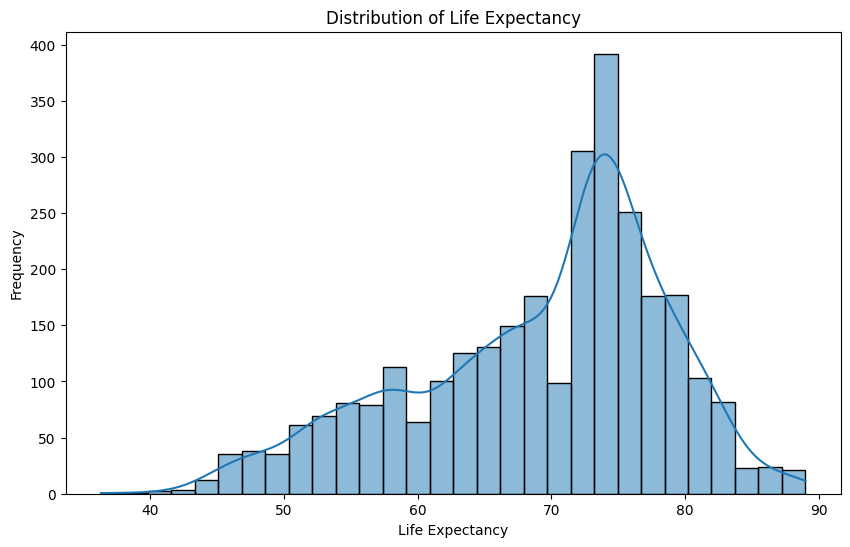

In [6]:
#Basic EDA
#distribution o life Expectancy
plt.figure(figsize=(10,6))
sns.histplot(df['Life expectancy '], bins=30, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

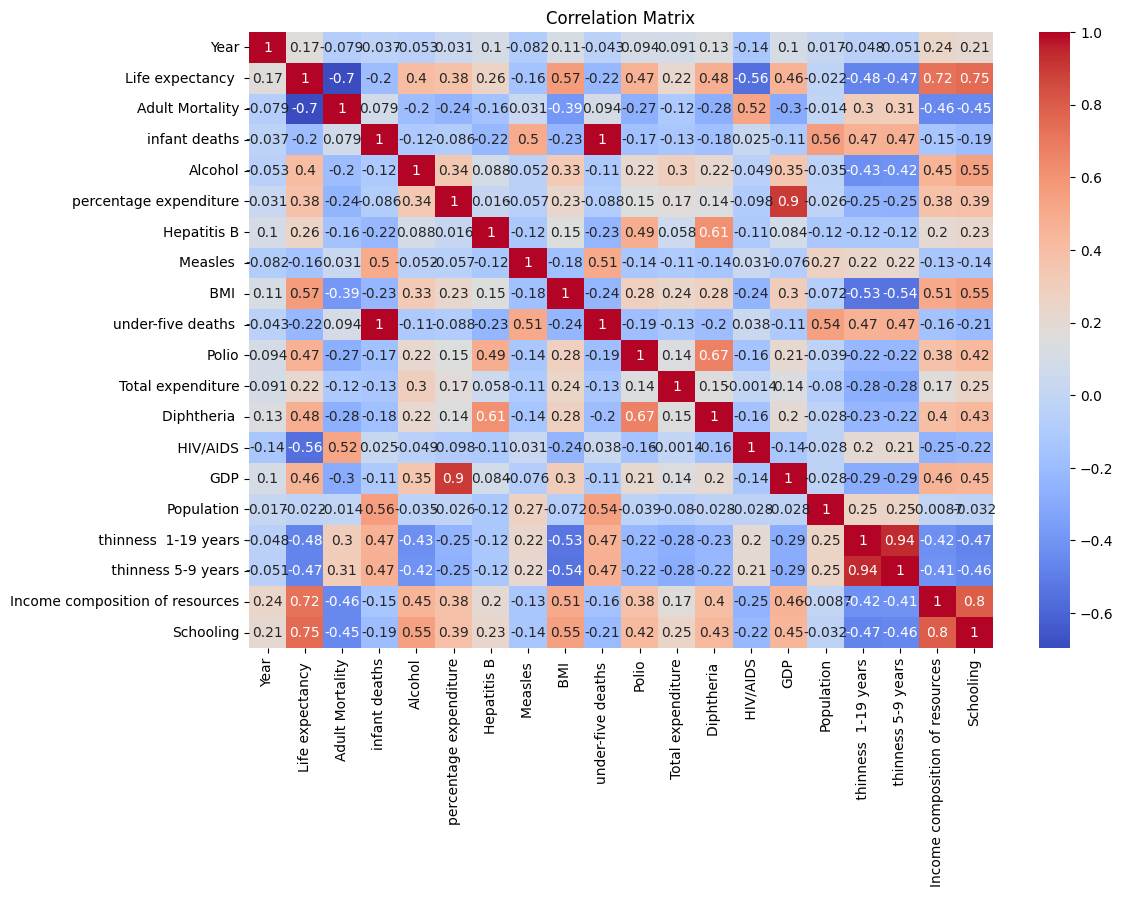

In [7]:
#Correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix = df.drop(['Country', 'Status'], axis=1).corr()
sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

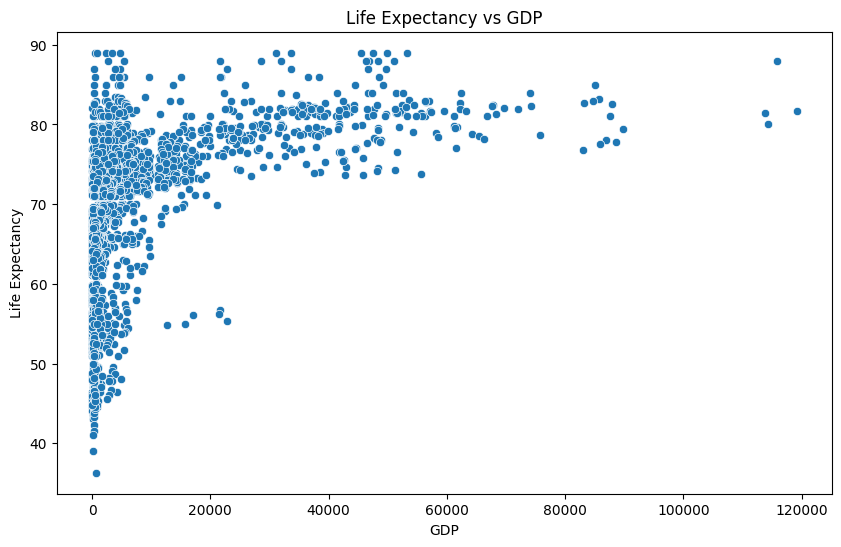

In [8]:
#Relationship Beteen Life Expectancy and GDP
plt.figure(figsize=(10,6))
sns.scatterplot(x='GDP', y='Life expectancy ', data=df)
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

In [9]:
#Statistical Analysis
#corelation Between life expectancy and key indicators
df_cleaned = df.dropna(subset=['GDP', 'Life expectancy '])
gdp_corr, _ = stats.pearsonr(df_cleaned['GDP'], df_cleaned['Life expectancy '])
print(f'Correlation between GDP and Life Expectancy: {gdp_corr}')

Correlation between GDP and Life Expectancy: 0.46145519262073825


In [10]:
#Hypothesis Testing
#is their a significant difference in life expectancy between high - income and low income countries
developed_countries = df[df['Status']=='Developed']['Life expectancy ']
developing_countries = df[df['Status'] == 'Developing']['Life expectancy ']
t_stat, p_value = stats.ttest_ind(developed_countries.dropna(), developing_countries.dropna())
print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')

t-statistic: 29.76836505889292
p-value: 2.4650861700062064e-170


In [11]:
if p_value < 0.05:
  print({"The difference in life expectancy between high-income and low-income countries is statistically significant"})
else:
  print({"There is no statistically significant difference in life expectancy between high-income and low-income countries"})
#Regre

{'The difference in life expectancy between high-income and low-income countries is statistically significant'}


In [12]:
#Regression Analysis
import statsmodels.api as sm
# Regression model: Life Expectancy ~ GDP + Healthcare Expenditure + Education Index + other factors
regression_cols = ['GDP', 'Total expenditure', 'Schooling', 'Adult Mortality', 'Life expectancy ']
df_regression = df.dropna(subset=regression_cols)
X = df_regression[['GDP', 'Total expenditure', 'Schooling', 'Adult Mortality']] # Add relevant features
y = df_regression['Life expectancy ']
# Add Constant to the model(incept)
X =sm.add_constant(X)
#Fit the model
model = sm.OLS(y, X).fit()
#Print Model Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1533.
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        04:22:23   Log-Likelihood:                -7083.3
No. Observations:                2327   AIC:                         1.418e+04
Df Residuals:                    2322   BIC:                         1.421e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                56.1440      0.54

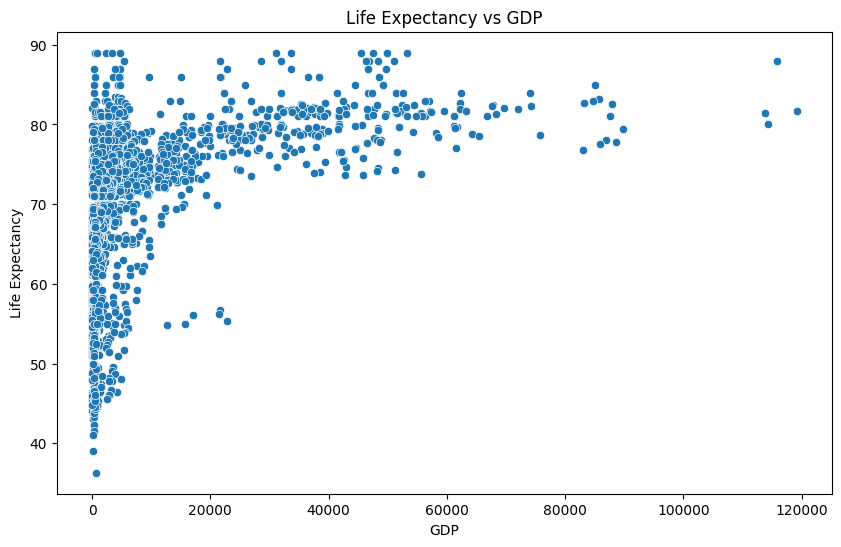

In [13]:
#Visualize the regression results
plt.figure(figsize=(10,6))
sns.scatterplot(x='GDP', y='Life expectancy ', data=df_regression)
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler , LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
#load Data Set
df = pd.read_csv('/content/Life Expectancy Data.csv')
df.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [16]:
df.shape

(2938, 22)

In [17]:
#data Cleaning
df.isnull().sum()
for cols in df.columns:
  if df[cols].isnull().sum()>0:
    print(cols)

Life expectancy 
Adult Mortality
Alcohol
Hepatitis B
 BMI 
Polio
Total expenditure
Diphtheria 
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [18]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for col in df.columns:
  if df[col].isnull().sum() > 0:
    if df[col].dtype in ['float64', 'int64']:
      df[col] = imputer.fit_transform(df[[col]])

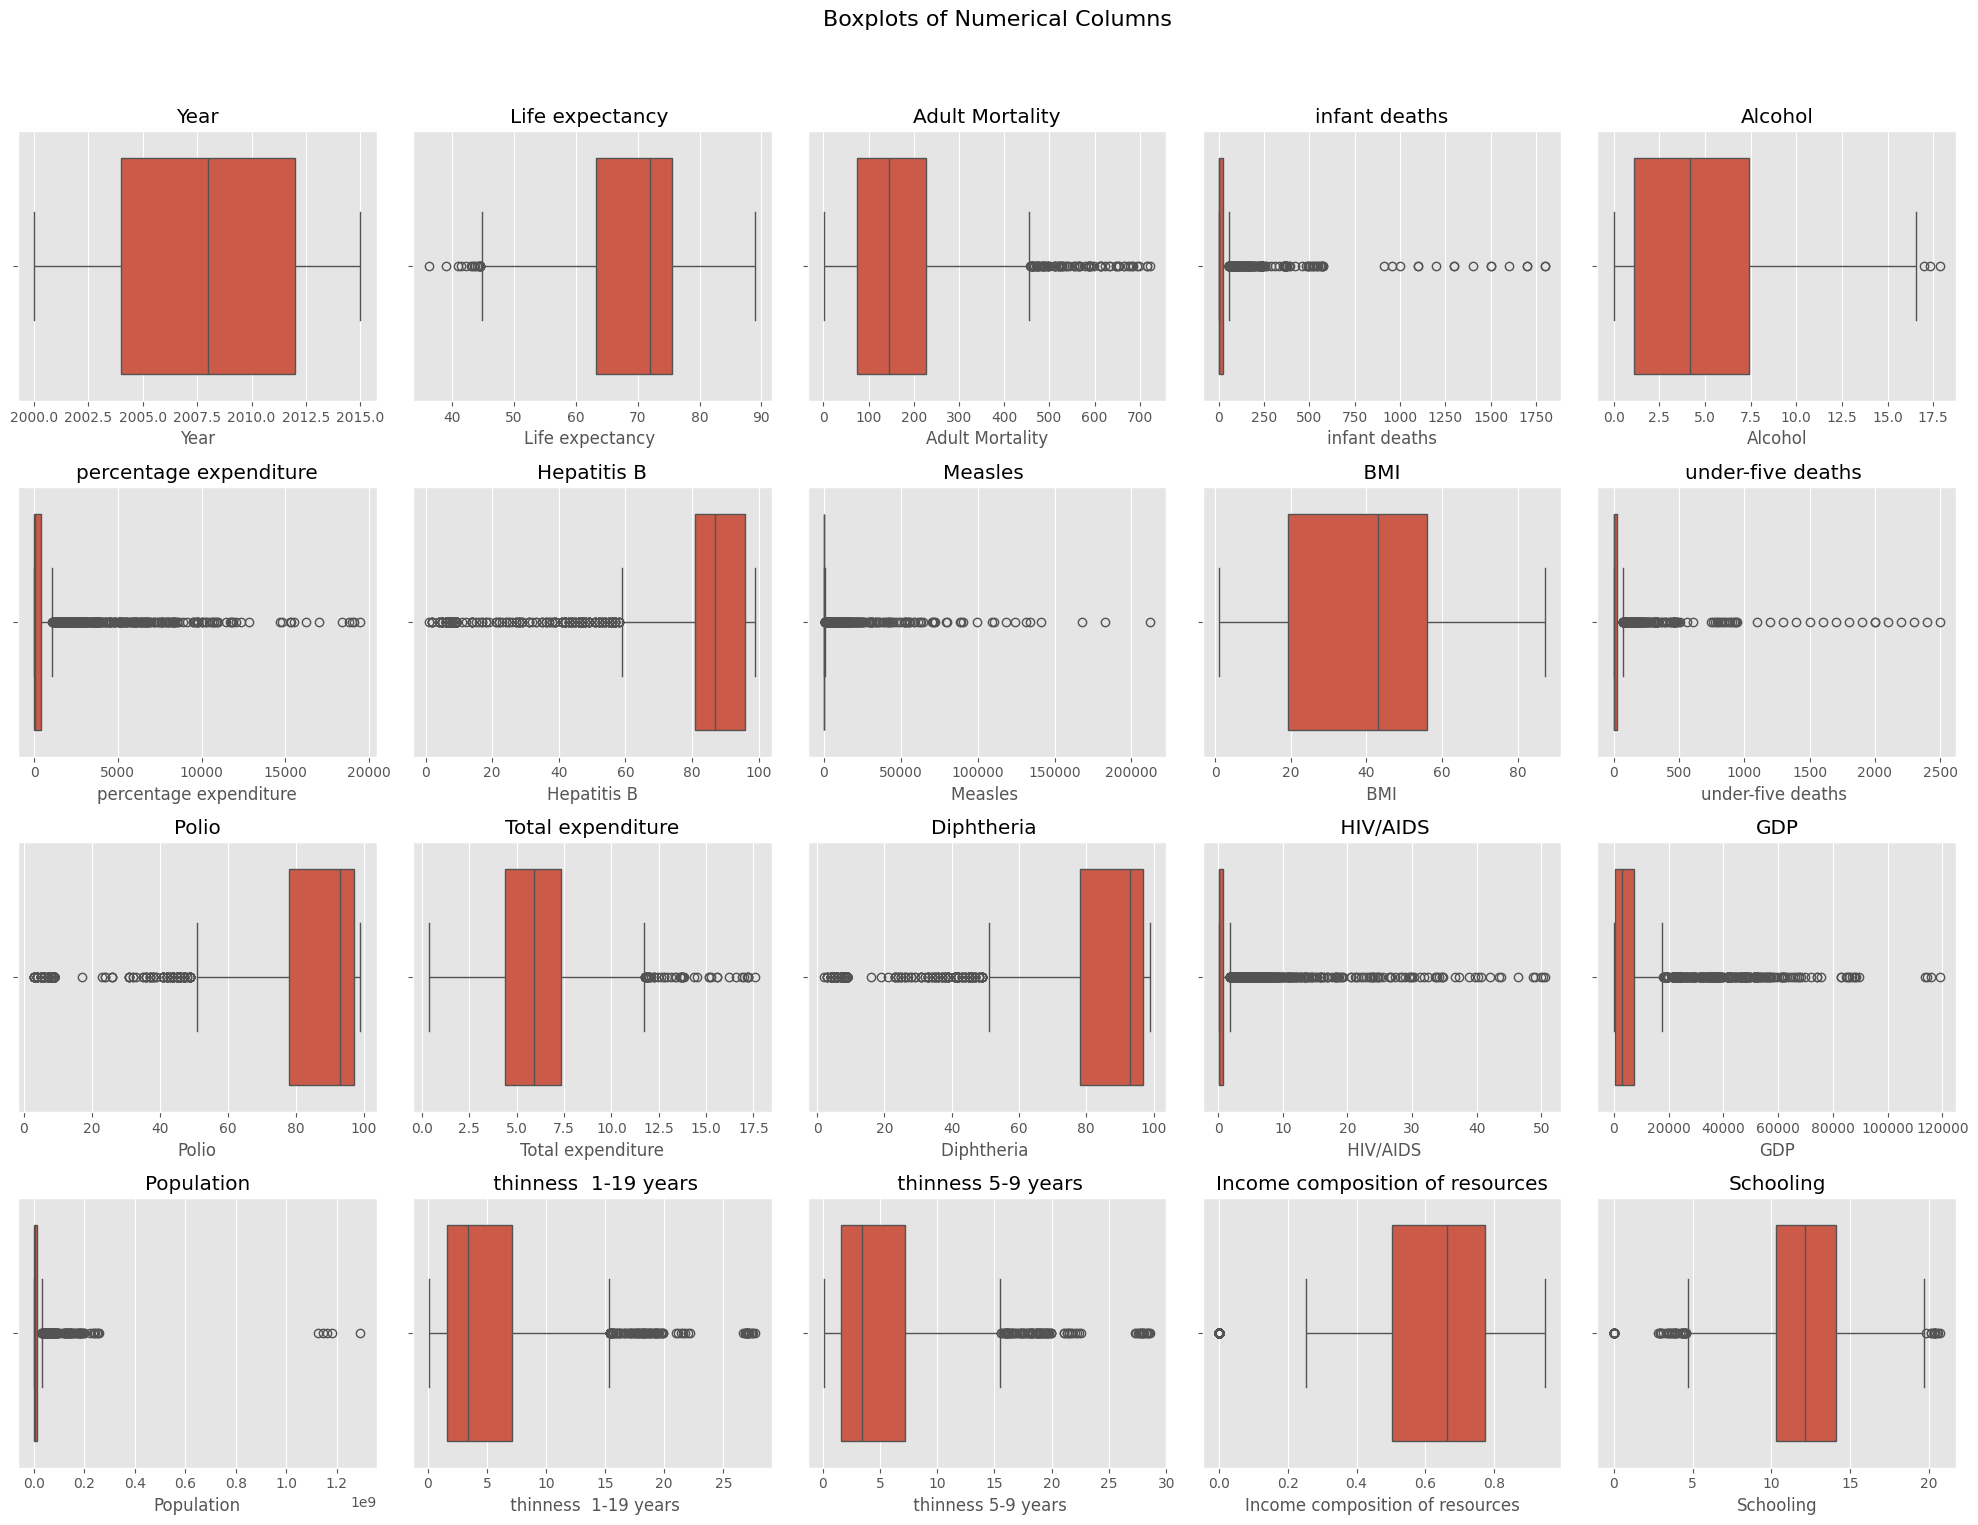

In [19]:
#Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(4,5, figsize=(20,16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)

#Flatten the axex array for easy iteration
axes= axes.flatten()

#Plot boxplots for each numerical column
for i , col in enumerate(numerical_cols):
  sns.boxplot(x=df[col], ax=axes[i])
  axes[i].set_title(col)
#Remove any empty subplots
for j in range(len(numerical_cols), len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout(rect=[0, 0.03 , 1 , 0.95])
plt.show()

In [20]:
#Secify the list of columns you want to handle outliers for
outlier_cols = ['Adult Mortality','infant deaths', 'Alcohol' , ]
for col_name in outlier_cols:
  #Calculate quartiler and IQR
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3 - q1

#Define the lower and upper bounds for outliers
lower_bounds = q1 - 1.5 * iqr
upper_bounds = q3 + 1.5 * iqr

#Replace outliers with the lower and upper bounds
df[col_name] = np.where((df[col_name] > upper_bounds) | (df[col_name] < lower_bounds), np.mean(df[col_name]), df[col_name])

In [21]:
df.shape

(2938, 22)

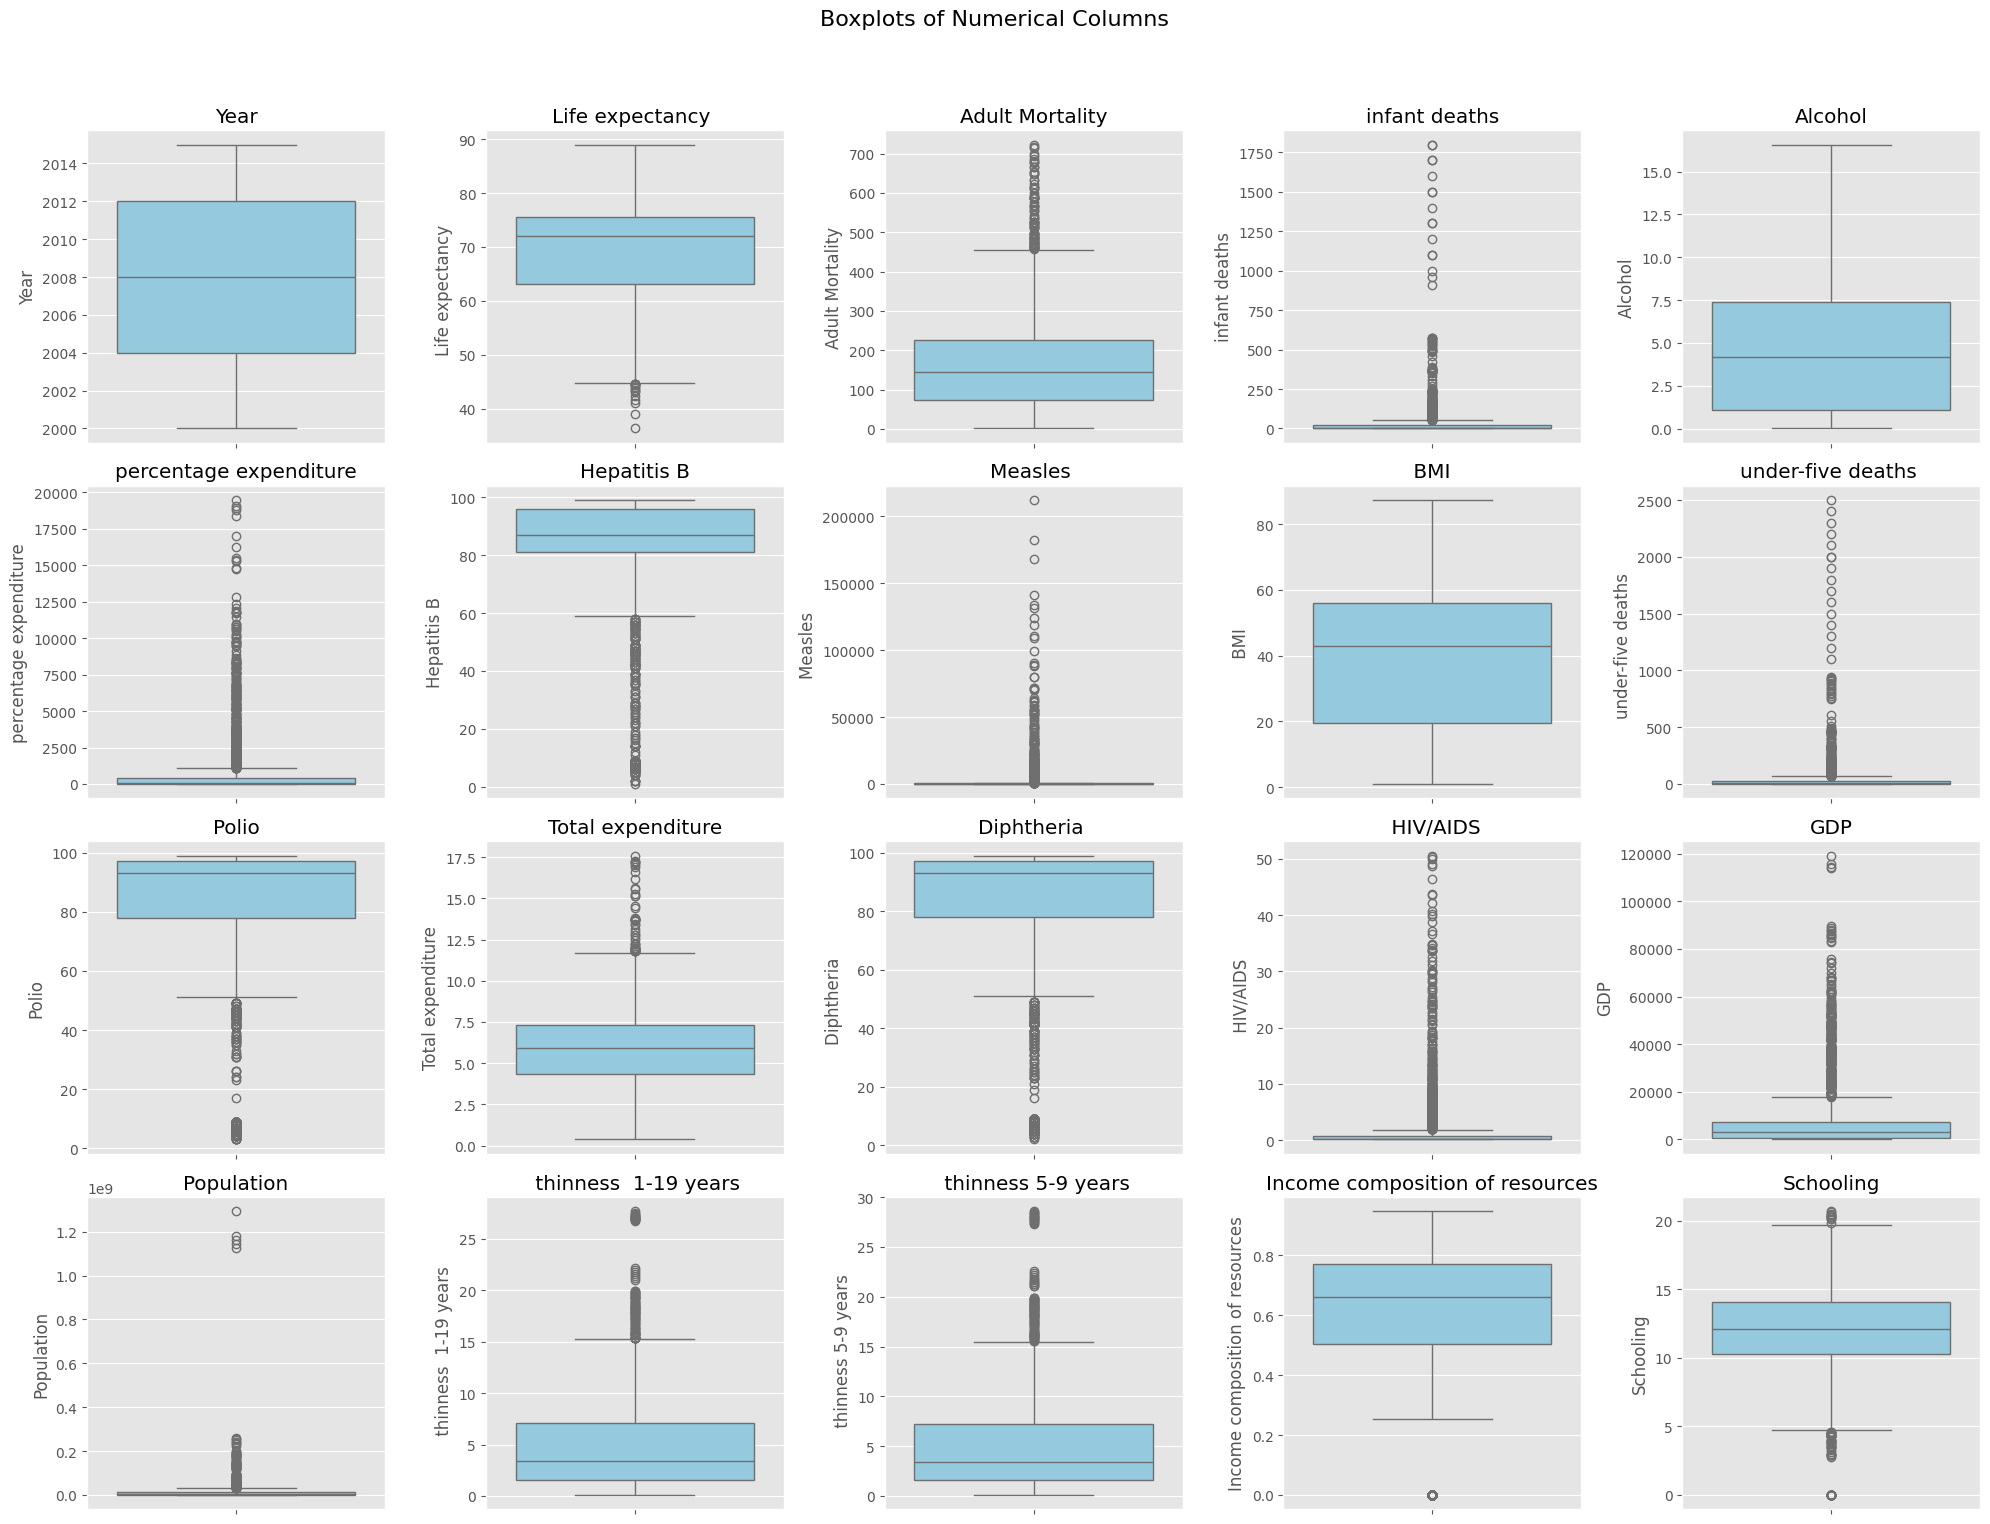

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [22]:
#Select only numerical Columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(4,5, figsize=(20,16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)

#Flatten the axes array fro easy iteration
axes = axes.flatten()

#plot Boxplots for each numerical column
for i , col in enumerate(numerical_cols):
  sns.boxplot(y=df[col], ax=axes[i], color = 'skyblue')
  axes[i].set_title(col)

#Remove any empty subplots
for j in range(len(numerical_cols) , len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout(rect=[0 , 0.03 , 1 , 0.95])
plt.show()

#Exploratory Data Analysis
df.head()

In [23]:
#Flatten the axes array for easy iteration
axes= axes.flatten()

#Plot boxplots for each numerical column
for i , col in enumerate(numerical_cols):
  sns.boxplot(x=df[col], ax=axes[i])
  axes[i].set_title(col)

In [24]:
df.Country.value_counts()

,count
Country,
Afghanistan,16
Albania,16
Algeria,16
Angola,16
Antigua and Barbuda,16
...,...
Monaco,1
Marshall Islands,1
Saint Kitts and Nevis,1


In [25]:
#Calculate the average life expectacy for each year
average_life_expectancy = df.groupby("Year")["Life expectancy "].mean().reset_index()

#Create the interactive line plot
fig = px.line(average_life_expectancy , x='Year' , y='Life expectancy ' , title='Average Life Expectancy Over Time', labels = {'Year' : 'Year' , 'Life expectancy ' : ' Life Expectancy(years)'}, template = 'plotly_dark')

#Show the plot
fig.show()

In [26]:
#Create the interactive scatter plot
fig = px.scatter(df , x='Population' , y = 'Life expectancy ', hover_name = 'Country' , color = 'Status', animation_frame='Year' , title = 'Population vs Life Expectancy', labels={'Population': 'Population' , 'Life expectancy':'Life Expectancy(years)'} , template = 'plotly_dark')

#Show the plot
fig.show()

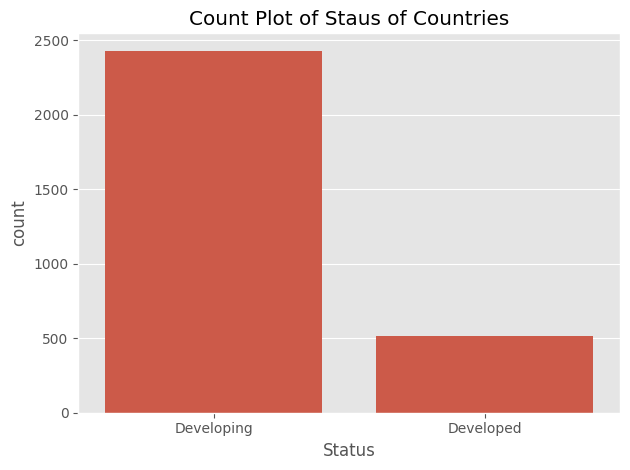

In [27]:
sns.countplot(x=df['Status'])
plt.title("Count Plot of Staus of Countries")
plt.tight_layout()
plt.show()

In [28]:
life_expact_status = df.groupby('Status')['Life expectancy '].mean().reset_index()
fig = px.histogram(life_expact_status , x = "Status" , y ='Life expectancy ' , color = 'Status')
fig.update_layout(title=dict(text = '<b>Average Life Expectation for Status of Country </b>' , x = 0.5))
fig.show()

In [29]:
#Calculate the Average life expectancy and average alchol consumption for each year
average_data = df.groupby('Year')[['Life expectancy ', 'Alcohol']].mean().reset_index()
#Create the interactive plot with dual y-axes
fig = go.Figure()
#Add Life expectancy trace
fig.add_trace(go.Scatter(x=average_data['Year'], y=average_data['Life expectancy '], mode='lines + markers', name='Life Expectancy', yaxis = 'y1'))
#Add alcohol countion trace
fig.add_trace(go.Scatter(x=average_data['Year'], y=average_data['Alcohol'], mode='lines + markers', name='Alcohol Consumption', yaxis='y2'))
#Update layout
fig.update_layout(title='Average Life Expectancy and Alcohol Consumption Over Time', xaxis_title='Year', yaxis=dict(title='Life Expectancy (years)'), yaxis2=dict(title='Alcohol Consumption (liters)', side='right' , overlaying='y' ),template = 'plotly_dark')
#Show the plot
fig.show()

In [30]:
fig = px.bar(df.groupby('Status' , as_index=False).agg({'Alcohol' : 'mean'}) , y ='Alcohol' , x='Status' , title ="Average Alcohol consumption of Developing and Developed Countries", labels={'Alcohol': 'Alcohol Consumption(liters per capita)', 'Life expectancy': 'Life Expextancy(years)'}, template = 'plotly_dark')
fig.show()

In [31]:
#Calculate the average life expectancy for each year of schooling
aggregated_data = df.groupby('Schooling')['Life expectancy '].mean().reset_index()
#Create the interactive  line plot
fig = px.line(aggregated_data , x = "Schooling" , y = 'Life expectancy ' , title="AverageLife Expectancy vs Year of Schooling" , labels = {'Schooling' : 'Years of Schooling' , 'Life expectancy': 'Life Expectancy(years)'},template = 'plotly_dark')
#show the plot
fig.show()

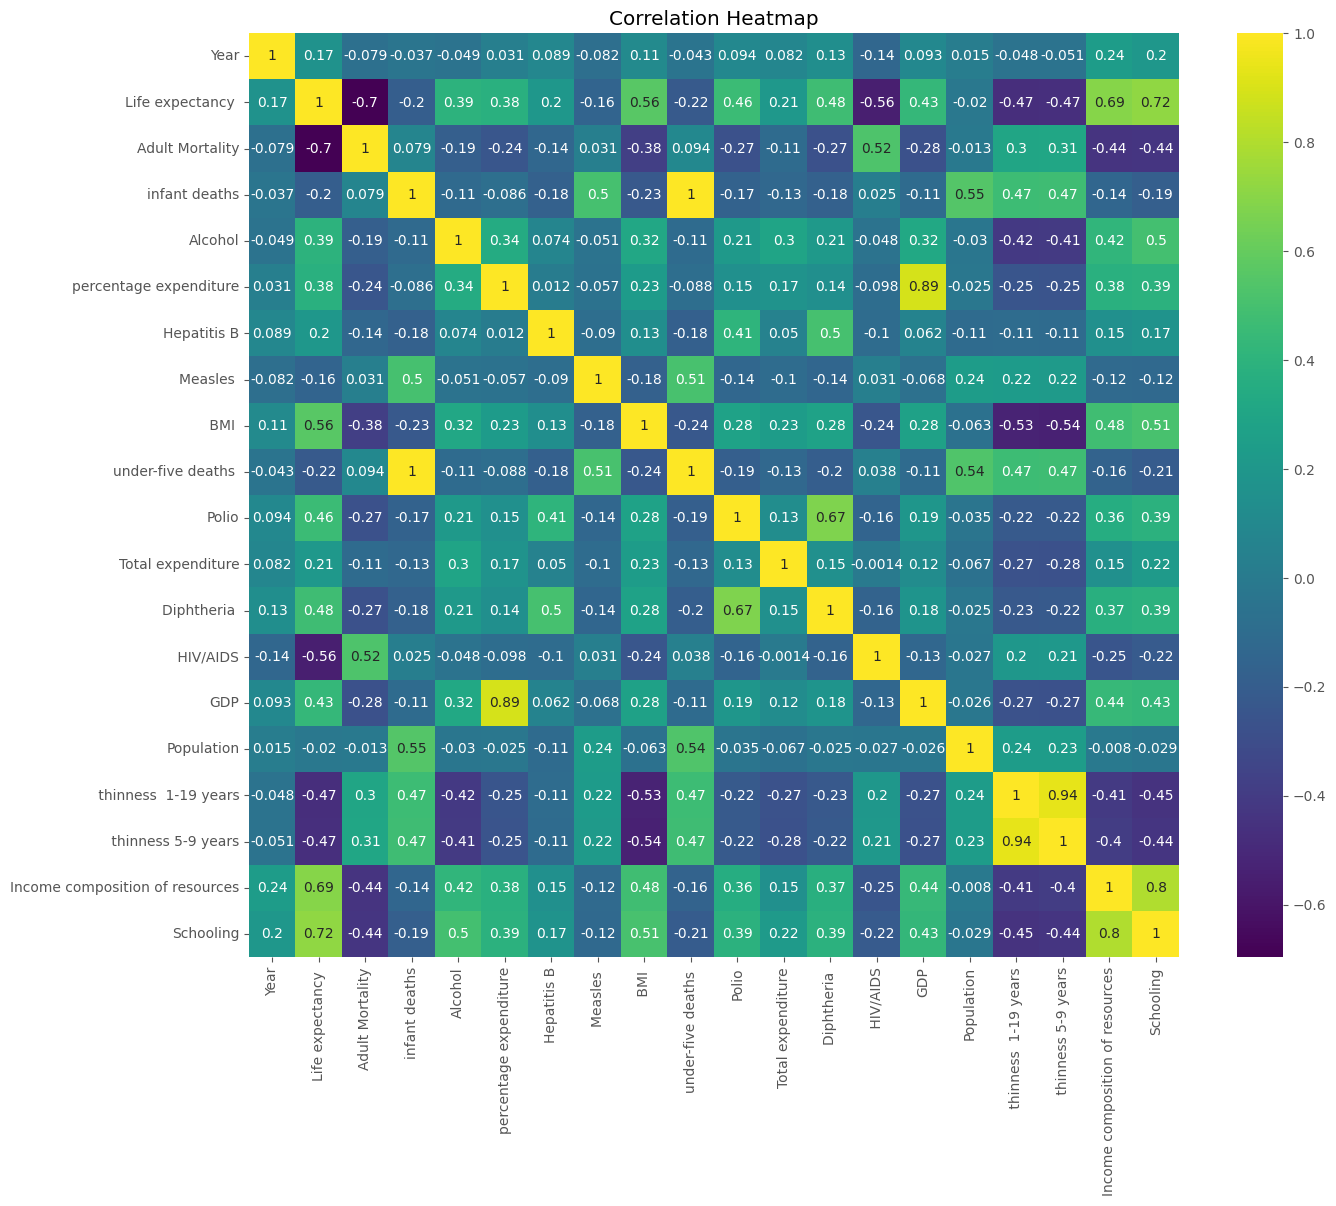

In [32]:
plt.figure(figsize=(15,12))
sns.heatmap(df[numerical_cols].corr(),cmap='viridis',annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
Le = LabelEncoder()
cat_cols = df.select_dtypes(include=['object']).columns
for cols in cat_cols:
  df[cols] = Le.fit_transform(df[cols])
  x=df.drop(columns=['Life expectancy '])
  y=df['Life expectancy ']

In [34]:
scaler = StandardScaler()
cols_to_scale = x.drop(columns = 'Status').columns

# for cols in cols_to scale:
x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])
x.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-1.691042,1.621762,1,0.791586,0.268824,-1.176057,-0.335570,-0.705861,-0.110384,-0.964715,...,-3.278638,0.925806,-0.732952,-0.323445,-0.525248,0.389975,2.813130,2.773279,-0.725401,-0.579931
1,-1.691042,1.404986,1,0.856072,0.285786,-1.176057,-0.334441,-0.838704,-0.168124,-0.989810,...,-1.051482,0.934140,-0.859877,-0.323445,-0.523083,-0.230936,2.881408,2.817902,-0.740050,-0.610570
2,-1.691042,1.188210,1,0.831890,0.302749,-1.176057,-0.334594,-0.750142,-0.173531,-1.014905,...,-0.880163,0.913306,-0.775260,-0.323445,-0.521632,0.352715,2.926927,2.862526,-0.769349,-0.641209
3,-1.691042,0.971434,1,0.864132,0.328193,-1.176057,-0.332096,-0.617299,0.032045,-1.040000,...,-0.666013,1.075815,-0.648335,-0.323445,-0.518723,-0.168315,2.972446,2.929461,-0.803531,-0.671847
4,-1.691042,0.754658,1,0.888314,0.345155,-1.176057,-0.367862,-0.573018,0.051757,-1.060076,...,-0.623183,0.804966,-0.606027,-0.323445,-0.564893,-0.181666,3.040724,2.974085,-0.847480,-0.763764


In [35]:
#Model Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score , mean_squared_error

In [36]:
x_train,x_test, y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=30)
print(f'Shape of X_train : {x_train.shape}')
print(f'Shape of X_test : {x_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')


Shape of X_train : (2350, 21)
Shape of X_test : (588, 21)
Shape of y_train : (2350,)
Shape of y_test : (588,)


In [37]:
models = {'Random Forest' : RandomForestRegressor(random_state=42), 'Extra Tree Regressor': ExtraTreesRegressor(random_state=42), 'XGBoost': XGBRegressor(random_state=42), 'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42) , 'XGB Regressor' : XGBRegressor()}
#list to store results
results = []
#Train and evaluate each model
for model_name , model in models.items():
  #Train the model
  model.fit(x_train , y_train)
  #Make predictions on the test set
  y_pred = model.predict(x_test)

  #calculate matrix
  rmse = mean_squared_error(y_test , y_pred )
  r2 = r2_score(y_test , y_pred)

  #Store results in lists
  results.append({'Model': model_name , 'EMSE':  rmse , 'R2 Score': r2})
  results_df = pd.DataFrame(results)
  results_df= results_df.sort_values(by='R2 Score', ascending=False)
  results_df

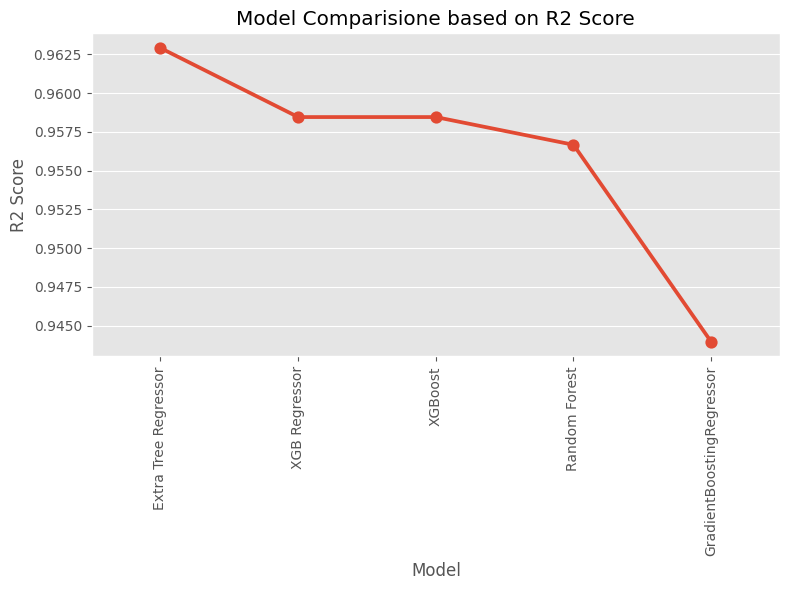

In [40]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model' ,y='R2 Score' , data = results_df )
plt.xticks(rotation=90)
plt.title('Model Comparisione based on R2 Score')
plt.tight_layout()
plt.show()

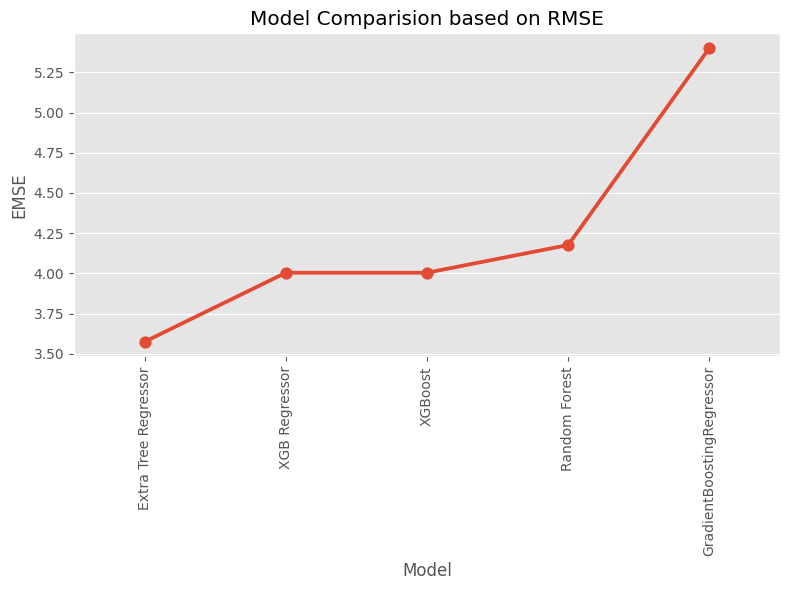

In [43]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model' , y='EMSE' , data = results_df)
plt.xticks(rotation=90)
plt.title('Model Comparision based on RMSE')
plt.tight_layout()
plt.show()

In [45]:
#Cross validate Final Model
from sklearn.model_selection import cross_val_score , KFold
based_model = XGBRegressor()
kf= KFold(n_splits=20 , shuffle=True , random_state=42)
cross_val = cross_val_score(based_model , x , y , cv=kf , scoring='r2')
print(cross_val)

[0.96865452 0.96642158 0.97820743 0.95256773 0.97244576 0.95796393
 0.96776559 0.96258789 0.97632442 0.95670267 0.96619953 0.96929828
 0.9630951  0.9572331  0.96830554 0.95263993 0.95874079 0.96507705
 0.96289328 0.95779543]


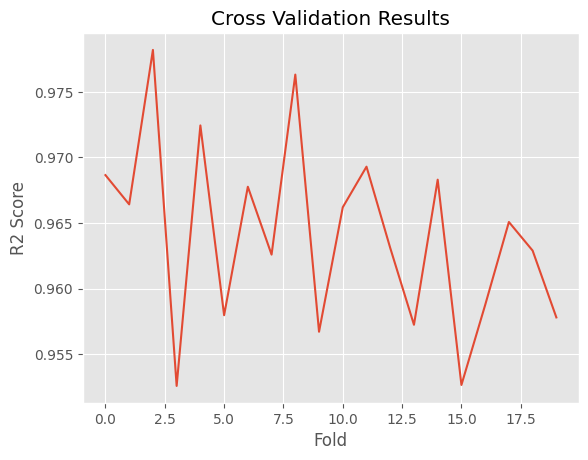

In [46]:
plt.plot(cross_val)
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.title('Cross Validation Results')
plt.show()

In [47]:
cross_val.mean()

np.float64(0.964045978048041)

In [48]:
cross_val.std()

np.float64(0.007016996318722491)

Predictive Factors (Regression Analysis): The regression analysis suggests that GDP, Schooling, and Adult Mortality are significant predictors of life expectancy. Total expenditure, however, did not appear to be a significant predictor in the regression model.

Model Performance: The machine learning models, especially XGBoost, demonstrated good performance in predicting life expectancy based on the selected features, as indicated by the R2 scores and cross-validation results.